In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# New Section

In [2]:
# Preprocessing steps (similar to Step 1)
# Drop non-beneficial columns
df = df.drop(columns=['EIN', 'NAME'])


In [3]:
# Create bins for APPLICATION_TYPE and CLASSIFICATION
application_counts = df['APPLICATION_TYPE'].value_counts()
class_counts = df['CLASSIFICATION'].value_counts()

application_types_to_replace = list(application_counts[application_counts < 100].index)
classifications_to_replace = list(class_counts[class_counts < 100].index)

for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app, "Other")

for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls, "Other")

In [4]:
# Encode categorical variables
df = pd.get_dummies(df)


In [5]:
# Split data into features and target
X = df.drop(columns=['IS_SUCCESSFUL'])
y = df['IS_SUCCESSFUL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [6]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
def build_model(optimizer='adam', layers=[80, 30], dropout_rate=0.0):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=layers[0], activation='relu', input_dim=X_train_scaled.shape[1]))

    if dropout_rate > 0:
        model.add(tf.keras.layers.Dropout(dropout_rate))

    for layer in layers[1:]:
        model.add(tf.keras.layers.Dense(units=layer, activation='relu'))

        if dropout_rate > 0:
            model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [8]:
# Attempt 1: Initial Model
initial_model = build_model(optimizer='adam', layers=[80, 30])
initial_history = initial_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))
initial_loss, initial_accuracy = initial_model.evaluate(X_test_scaled, y_test)

print(f"Initial Model - Loss: {initial_loss}, Accuracy: {initial_accuracy}")


Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5707 - accuracy: 0.7231 - val_loss: 0.5591 - val_accuracy: 0.7224
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5530 - accuracy: 0.7304 - val_loss: 0.5569 - val_accuracy: 0.7228
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7320 - val_loss: 0.5557 - val_accuracy: 0.7233
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7345 - val_loss: 0.5563 - val_accuracy: 0.7230
Epoch 5/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5467 - accuracy: 0.7332 - val_loss: 0.5560 - val_accuracy: 0.7245
Epoch 6/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5454 - accuracy: 0.7334 - val_loss: 0.5562 - val_accuracy: 0.7222
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5442 - accuracy: 0.7350 - val_loss: 0.5551 - val_accuracy: 0.7233

In [9]:
# Attempt 2: Adding Dropout Layers
dropout_model = build_model(optimizer='adam', layers=[80, 30], dropout_rate=0.2)
dropout_history = dropout_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))
dropout_loss, dropout_accuracy = dropout_model.evaluate(X_test_scaled, y_test)

print(f"Dropout Model - Loss: {dropout_loss}, Accuracy: {dropout_accuracy}")


Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5891 - accuracy: 0.7094 - val_loss: 0.5624 - val_accuracy: 0.7219
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5657 - accuracy: 0.7272 - val_loss: 0.5579 - val_accuracy: 0.7222
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5614 - accuracy: 0.7299 - val_loss: 0.5554 - val_accuracy: 0.7203
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5579 - accuracy: 0.7292 - val_loss: 0.5543 - val_accuracy: 0.7227
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5563 - accuracy: 0.7311 - val_loss: 0.5550 - val_accuracy: 0.7202
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5547 - accuracy: 0.7306 - val_loss: 0.5541 - val_accuracy: 0.7208
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.7329 - val_loss: 0.5538 - val_accuracy: 0.7233

In [10]:
# Attempt 3: Increasing Complexity
complex_model = build_model(optimizer='adam', layers=[128, 64, 32], dropout_rate=0.2)
complex_history = complex_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data=(X_test_scaled, y_test))
complex_loss, complex_accuracy = complex_model.evaluate(X_test_scaled, y_test)

print(f"Complex Model - Loss: {complex_loss}, Accuracy: {complex_accuracy}")


Epoch 1/150
804/804 [==============================] - 5s 5ms/step - loss: 0.5890 - accuracy: 0.7124 - val_loss: 0.5625 - val_accuracy: 0.7186
Epoch 2/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5641 - accuracy: 0.7287 - val_loss: 0.5576 - val_accuracy: 0.7217
Epoch 3/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5600 - accuracy: 0.7287 - val_loss: 0.5553 - val_accuracy: 0.7194
Epoch 4/150
804/804 [==============================] - 5s 6ms/step - loss: 0.5581 - accuracy: 0.7294 - val_loss: 0.5558 - val_accuracy: 0.7221
Epoch 5/150
804/804 [==============================] - 5s 6ms/step - loss: 0.5571 - accuracy: 0.7313 - val_loss: 0.5574 - val_accuracy: 0.7215
Epoch 6/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5556 - accuracy: 0.7314 - val_loss: 0.5537 - val_accuracy: 0.7254
Epoch 7/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5525 - accuracy: 0.7315 - val_loss: 0.5553 - val_accuracy: 0.7231

In [11]:
# Save the final optimized model
complex_model.save("AlphabetSoupCharity_Optimization.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


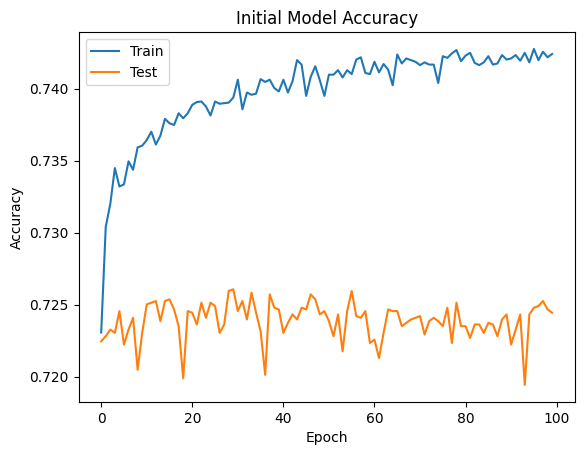

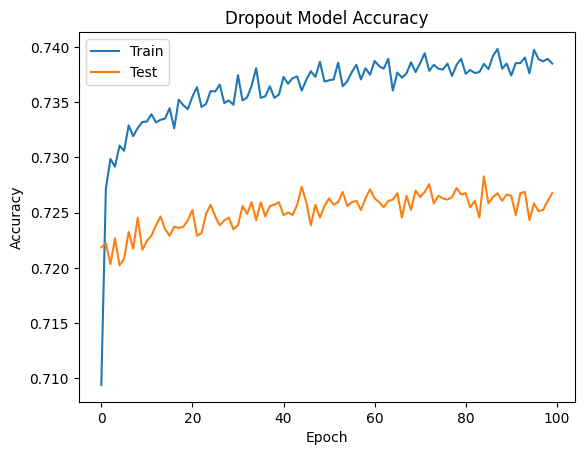

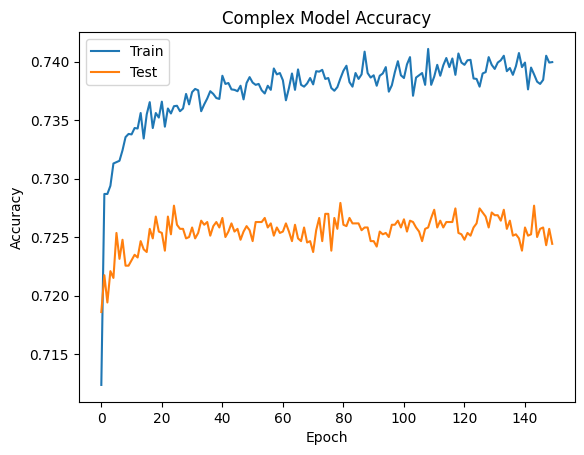

In [12]:

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_history(initial_history, "Initial Model Accuracy")
plot_history(dropout_history, "Dropout Model Accuracy")
plot_history(complex_history, "Complex Model Accuracy")